In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dingxuan00","key":"92f03d745f3c9bdc05d910624bfea1c7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download using the kaggle API
!kaggle datasets download -d lorenzozoppelletto/financial-risk-for-loan-approval

# Unzip the dataset if it's zipped
import zipfile
with zipfile.ZipFile("financial-risk-for-loan-approval.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/financial-risk")


Dataset URL: https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval
License(s): CC0-1.0
financial-risk-for-loan-approval.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
data = pd.read_csv("/content/financial-risk/Loan.csv")
data.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

# **Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# check for null values
df = data
(df.isnull().sum() != 0).sum()

0

In [ ]:
# check data types of columns
#df.dtypes

In [ ]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder

# identify categorical columns excluding ApplicationDate
categorical_cols = df[df.columns[(df.dtypes == "object") & (df.columns != "ApplicationDate")]]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

ApplicationDate  Age  AnnualIncome  CreditScore  EmploymentStatus  \
0      2018-01-01   45         39948          617                 0   
1      2018-01-02   38         39709          628                 0   
2      2018-01-03   47         40724          570                 0   
3      2018-01-04   58         69084          545                 0   
4      2018-01-05   37        103264          594                 0   

   EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  ...  \
0               4          22       13152            48              1  ...   
1               0          15       26045            48              2  ...   
2               1          26       17627            36              1  ...   
3               3          34       37898            96              2  ...   
4               0          17        9184            36              1  ...   

   MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                    0.724972         11    126928   
1    3309.083333                    0.935132          3     43609   
2    3393.666667                    0.872241          6      5205   
3    5757.000000                    0.896155          5     99452   
4    8605.333333                    0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

   LoanApproved  RiskScore  
0             0       49.0  
1             0       52.0  
2             0       52.0  
3             0       54.0  
4             1       36.0  

[5 rows x 36 columns]

Scatterplot

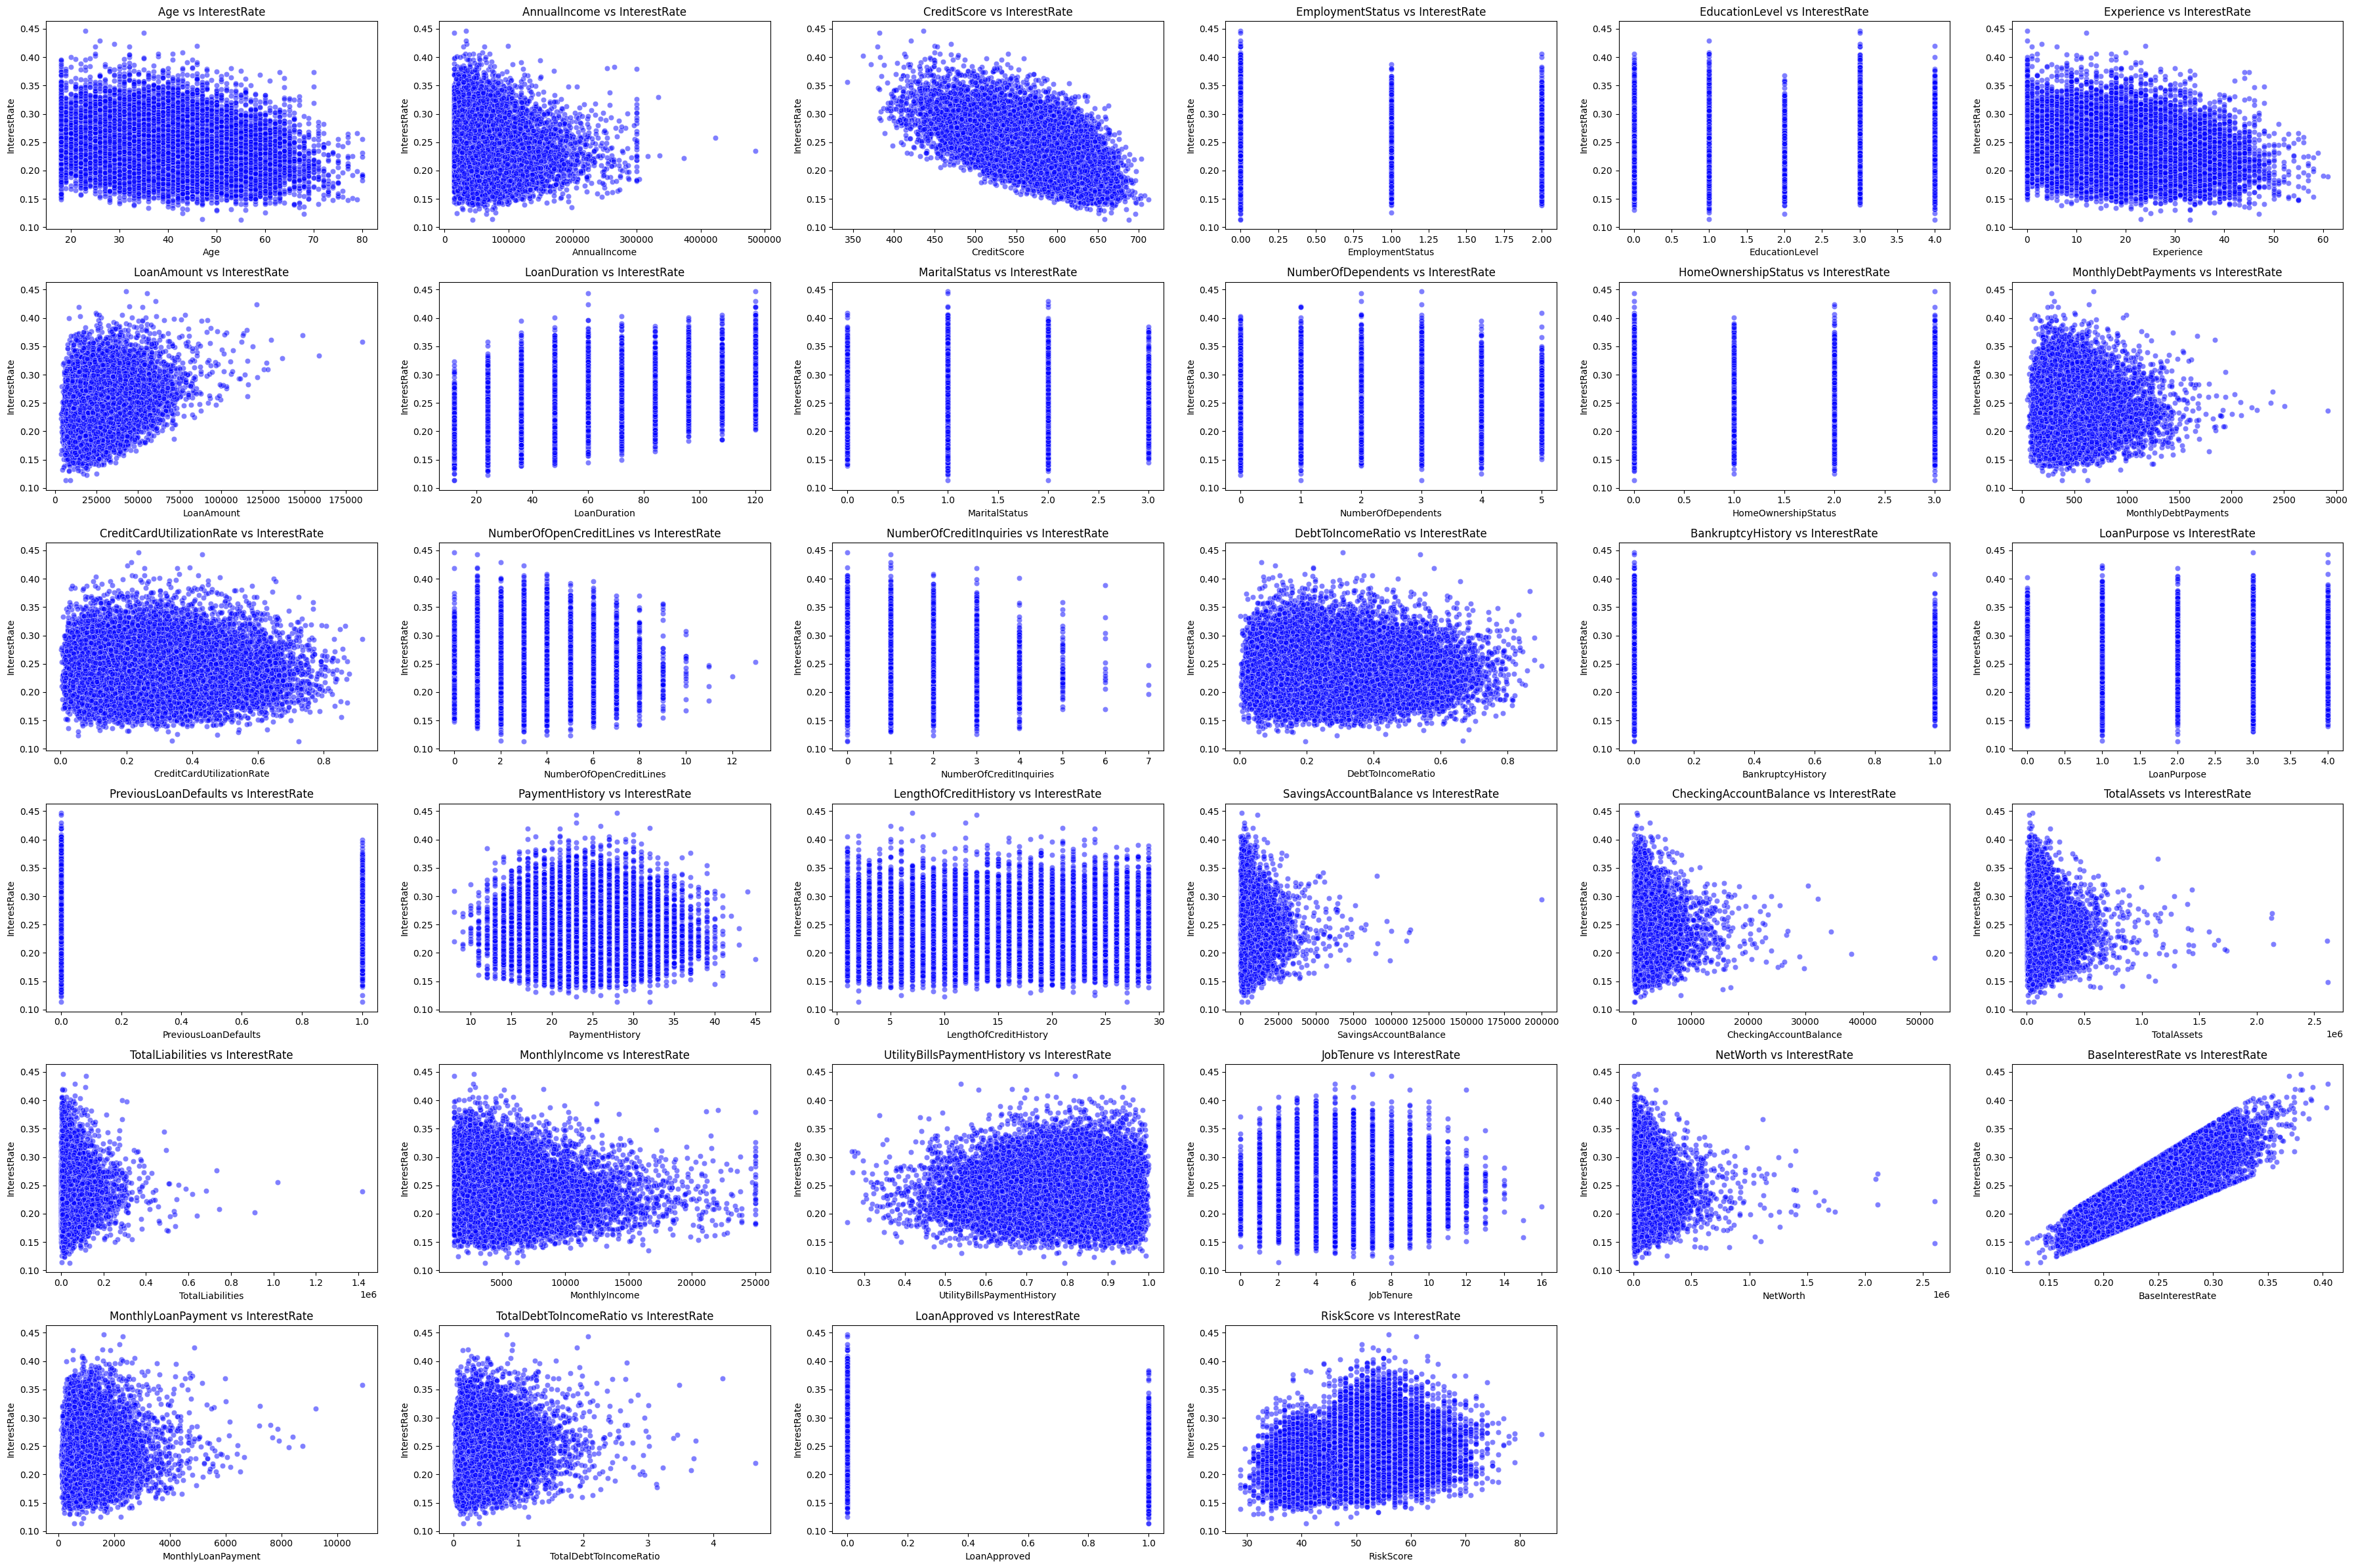

In [ ]:
# scatterplot for all features
features_all = df.drop(columns = ['ApplicationDate','InterestRate'])

num_cols = 6
num_rows = (len(features_all.columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(features_all):
    #plt.figure(figsize=(6, 4))
    sns.scatterplot(x=features_all[col], y=df['InterestRate'], alpha=0.5, color='blue', ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("InterestRate")
    axes[i].set_title(f"{col} vs InterestRate")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<Axes: >

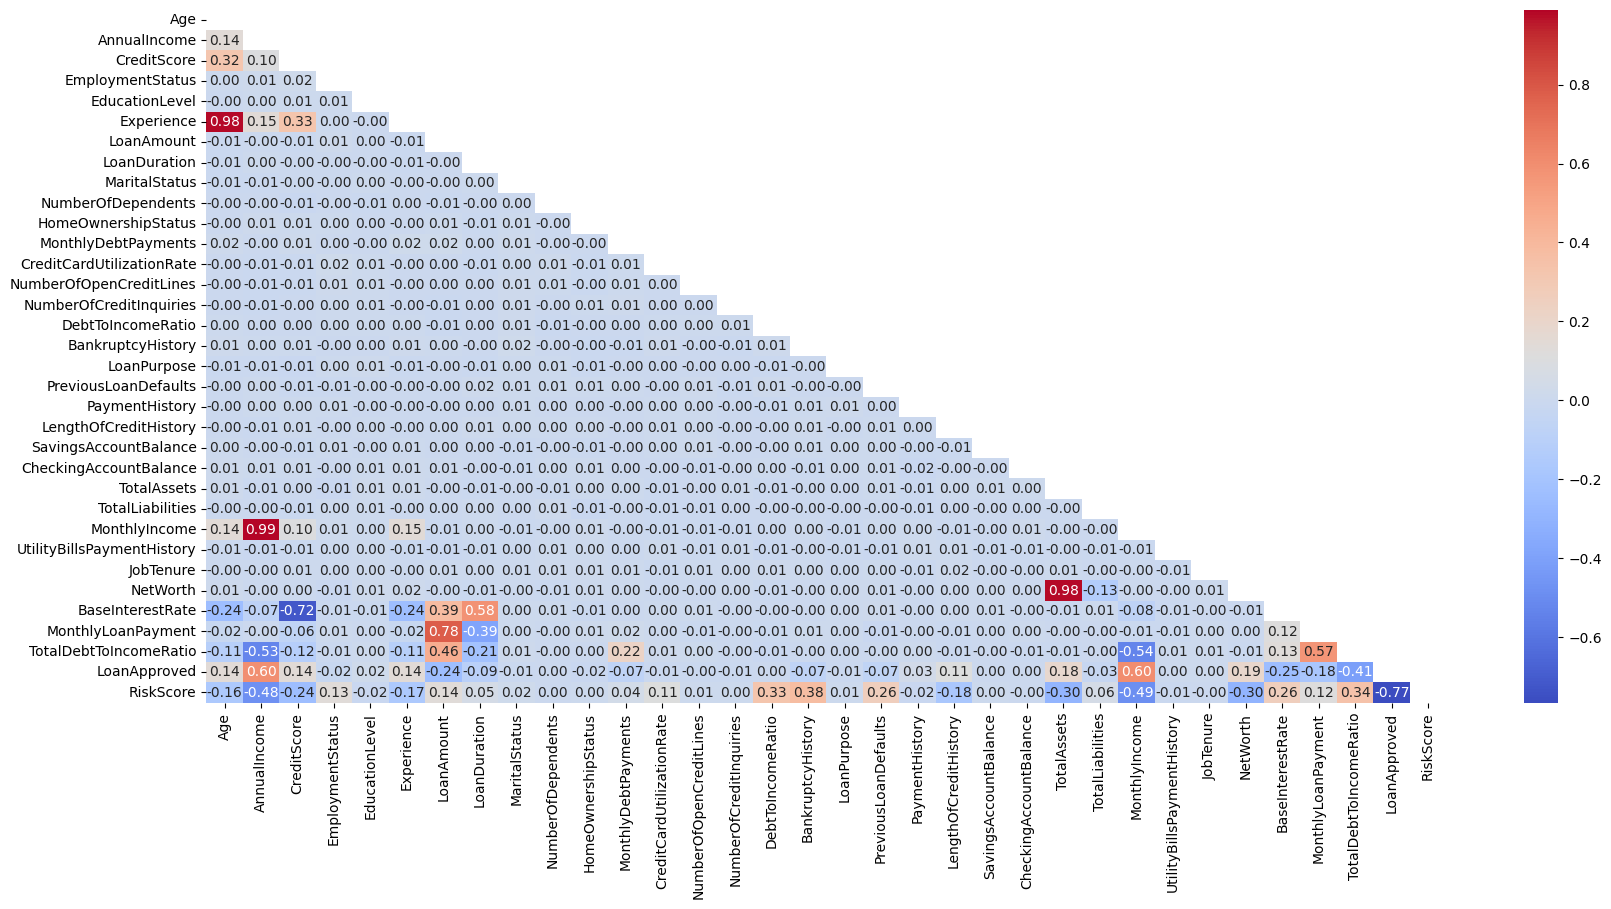

In [ ]:
# check for multicollinearity among variables
corr_matrix = features_all.corr()

# show half of the symmetric matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20,9))
plt.tight_layout()
sns.heatmap(corr_matrix, mask=mask, annot = True, cmap='coolwarm', fmt='.2f')

<Axes: >

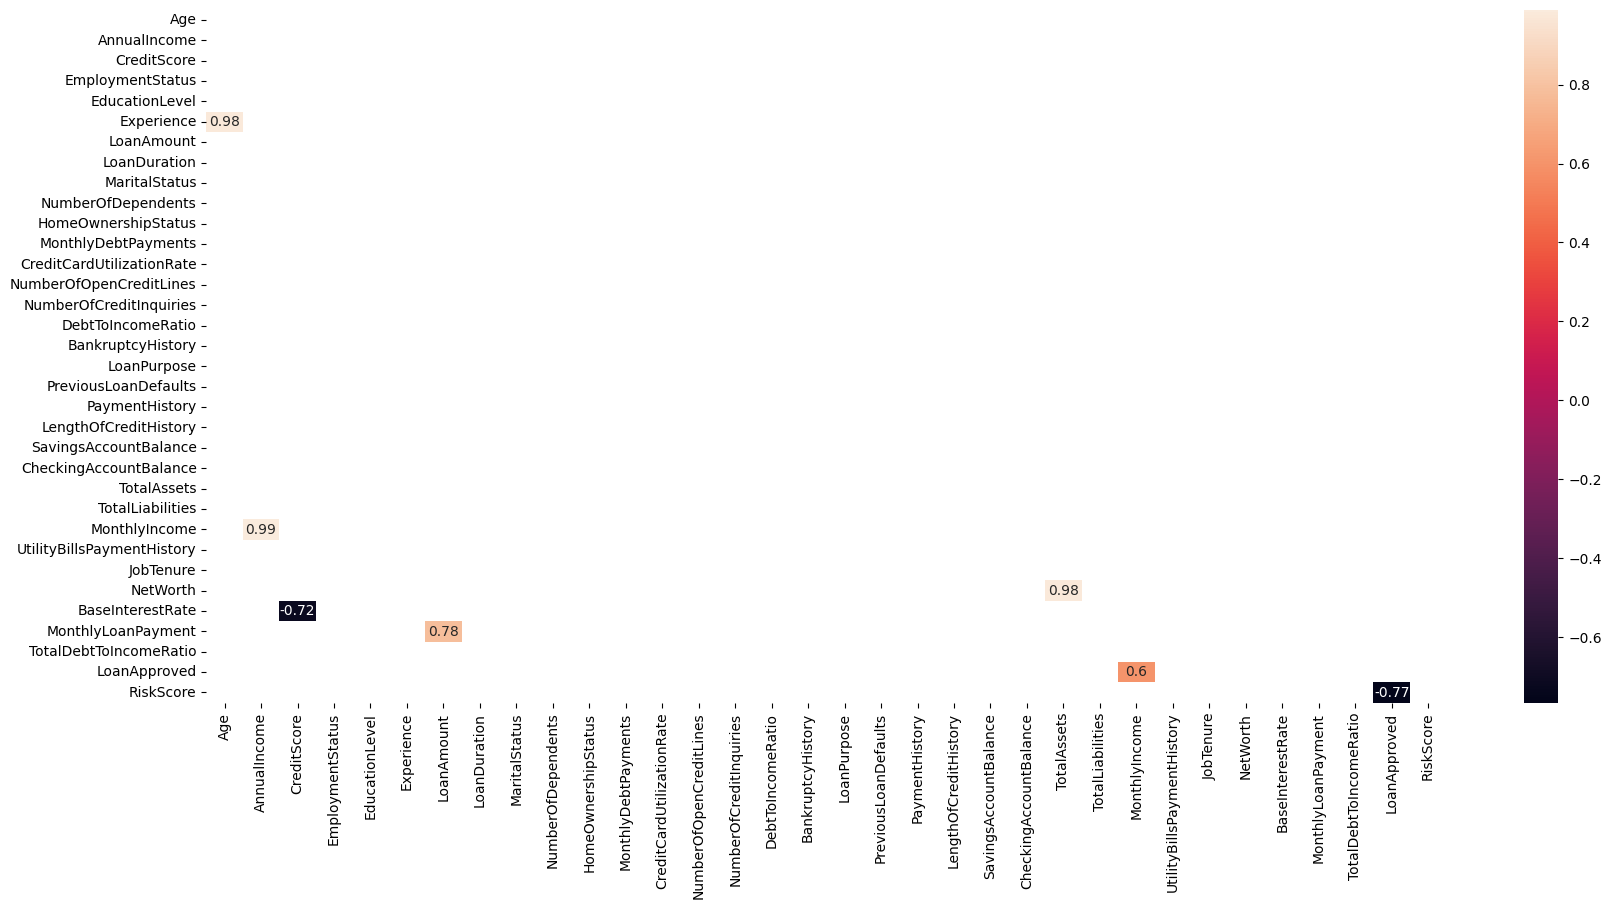

In [ ]:
# view variables with high positive/negative correlation (>= 0.6 or <= -0.6)
corr_matrix2 = corr_matrix.where((corr_matrix.abs() >= 0.6) & (corr_matrix.abs() >= -0.6))

plt.figure(figsize = (20,9))
sns.heatmap(corr_matrix2, mask=mask, annot = True)

Strong multicollinearity between:
- Experience and Age
- MonthlyIncome and AnnualIncome
- BaseInterestRate and CreditScore
- MonthlyLoanPayment and LoanAmount
- NetWorth and TotalAssets
- LoanApproved and MonthlyIncome
- RiskScore and LoanApproved


# **Part 1: Predicting Loan Approvals**

## **Random Forest Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

df = data

df = df.drop(columns=['ApplicationDate', 'BaseInterestRate'])

df = df.dropna()

# Define the ordered categories for EducationLevel
education_order = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

# Encode EducationLevel with OrdinalEncoder using the specified order
ordinal_encoder = OrdinalEncoder(categories=[education_order])
df[['EducationLevel']] = ordinal_encoder.fit_transform(df[['EducationLevel']])

# One-hot encode categorical variables
categorical_cols = ['EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split features and target variable
X = df.drop(columns=['LoanApproved'])  # Features
y = df['LoanApproved']  # Target

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame with feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, stratify = y, random_state=42)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
model = RandomForestClassifier(oob_score=True, random_state=42, bootstrap=True)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Compute probabilities for the positive class (e.g., class label 1)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Assuming the loan amount is in the 'LoanAmount' column of the dataset (X_test)
loan_amounts = X_test['LoanAmount']

def calculate_cost(y_true, y_probs, loan_amounts, threshold):
    # Apply threshold to get predictions
    y_pred = (y_probs >= threshold).astype(int)

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Compute costs
    false_positive_cost = (fp * loan_amounts[y_pred == 1]).sum()
    false_negative_cost = (fn * loan_amounts[y_pred == 0]).sum()  # False negative cost: missed loan approvals

    total_cost = false_positive_cost + false_negative_cost

    return total_cost

# Find the optimal threshold by minimizing the expected cost
thresholds = np.linspace(0, 1, 100)
costs = [calculate_cost(y_test, y_probs, loan_amounts, t) for t in thresholds]

optimal_threshold = thresholds[np.argmin(costs)]
print("Optimal Threshold:", optimal_threshold)

# Use the optimal threshold for final predictions
y_pred_thresholded = (y_probs >= optimal_threshold).astype(int)

# Evaluate the model based on the optimal threshold
print("Test Accuracy (Thresholded):", accuracy_score(y_test, y_pred_thresholded))
print(classification_report(y_test, y_pred_thresholded))

# Output the minimal expected cost
min_cost = min(costs)
print("Minimal Expected Cost:", min_cost)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.9894999999999999
Optimal Threshold: 0.010101010101010102
Test Accuracy (Thresholded): 0.70925
              precision    recall  f1-score   support

           0       1.00      0.62      0.76      3044
           1       0.45      1.00      0.62       956

    accuracy                           0.71      4000
   macro avg       0.73      0.81      0.69      4000
weighted avg       0.87      0.71      0.73      4000

Minimal Expected Cost: -695993.4985654512
OOB Score: 0.988875


In [ ]:
# Extract feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': df.drop(columns=['LoanApproved']).columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))


                   Feature  Importance
28               RiskScore    0.462489
27  TotalDebtToIncomeRatio    0.149658
21           MonthlyIncome    0.090915
1             AnnualIncome    0.086703
25            InterestRate    0.043025
5               LoanAmount    0.022794
24                NetWorth    0.017463
26      MonthlyLoanPayment    0.015120
19             TotalAssets    0.014275
12       DebtToIncomeRatio    0.009875


<ipython-input-10-571d78b1b783>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


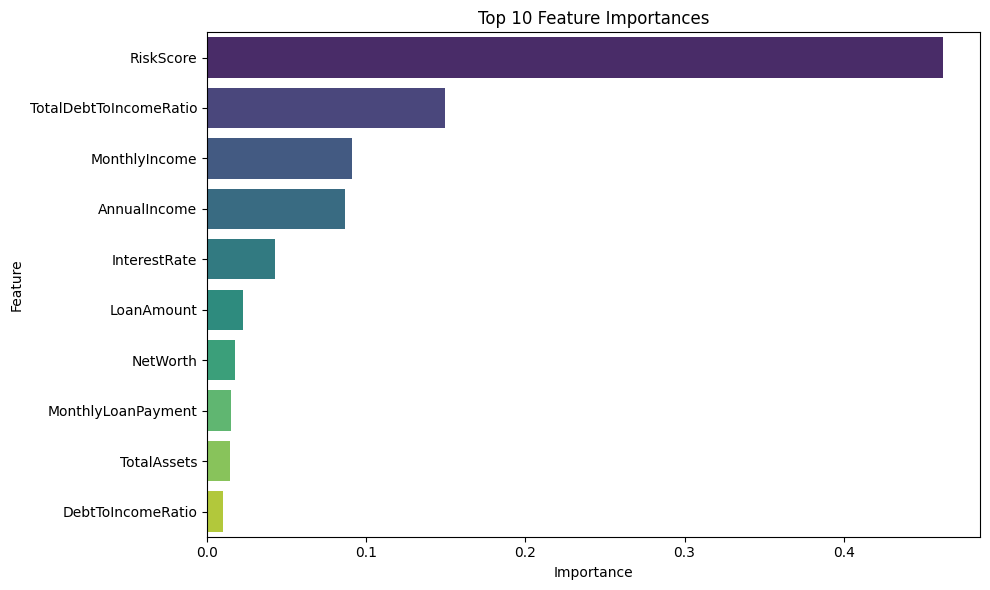

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')

# Adding labels and title
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.tight_layout()
plt.show()

## **XGBoost**

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
import pandas as pd

train_data = pd.concat([X_train, y_train], axis=1)

minority_class = train_data[train_data['LoanApproved'] == 1]
majority_class = train_data[train_data['LoanApproved'] == 0]

majority_class_undersampled = resample(majority_class,
                                       replace=True,
                                       n_samples=len(minority_class),
                                       random_state=42)

train_undersampled = pd.concat([majority_class_undersampled, minority_class])

X_train_undersampled = train_undersampled.drop('LoanApproved', axis=1)
y_train_undersampled = train_undersampled['LoanApproved']


# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [2,3,4],
    'learning_rate': [0.1, 0.5, 1.0],
    'gamma': [0,1,2],
    'reg_lambda': [0,1,2],
    'scale_pos_weight': [0.1, 0.5, 1]
}

# Initialize GridSearchCV
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=42,
                                subsample=0.9, colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',  # This will still optimize ROC AUC during search
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the training data
optimal_params.fit(X_train_undersampled, y_train_undersampled)

# Print the best parameters
print("Best parameters found: ", optimal_params.best_params_)

# Get the best model from GridSearchCV
best_model = optimal_params.best_estimator_

# Make predictions on the test set using the best model
y_probs = best_model.predict_proba(X_test)[:, 1]

loan_amounts = X_test['LoanAmount']

def calculate_cost(y_true, y_probs, loan_amounts, threshold):
    # Apply threshold to get predictions
    y_pred = (y_probs >= threshold).astype(int)

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Compute costs
    false_positive_cost = (fp * loan_amounts[y_pred == 1]).sum()  # Cost for false positives
    false_negative_cost = (fn * loan_amounts[y_pred == 0]).sum()  # Cost for false negatives

    total_cost = false_positive_cost + false_negative_cost

    return total_cost

# Try different thresholds to minimize cost
thresholds = np.linspace(0, 1, 100)
costs = [calculate_cost(y_test, y_probs, loan_amounts, t) for t in thresholds]

# Get the optimal threshold that minimizes the cost
optimal_threshold = thresholds[np.argmin(costs)]
print("Optimal Threshold:", optimal_threshold)


# Use the optimal threshold for final predictions
y_pred_thresholded = (y_probs >= optimal_threshold).astype(int)

# Evaluate the model based on the optimal threshold
print("Test Accuracy (Thresholded):", accuracy_score(y_test, y_pred_thresholded))
print(classification_report(y_test, y_pred_thresholded))

# Output the minimal expected cost
min_cost = min(costs)
print("Minimal Expected Cost:", min_cost)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 2, 'reg_lambda': 2, 'scale_pos_weight': 1}
Best ROC AUC score:  0.9999991400142758
Optimal Threshold: 0.30303030303030304
Test Accuracy (Thresholded): 0.9996513249651325
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1498
           1       1.00      1.00      1.00      1370

    accuracy                           1.00      2868
   macro avg       1.00      1.00      1.00      2868
weighted avg       1.00      1.00      1.00      2868

Minimal Expected Cost: 26384255


<ipython-input-36-5576cc306148>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


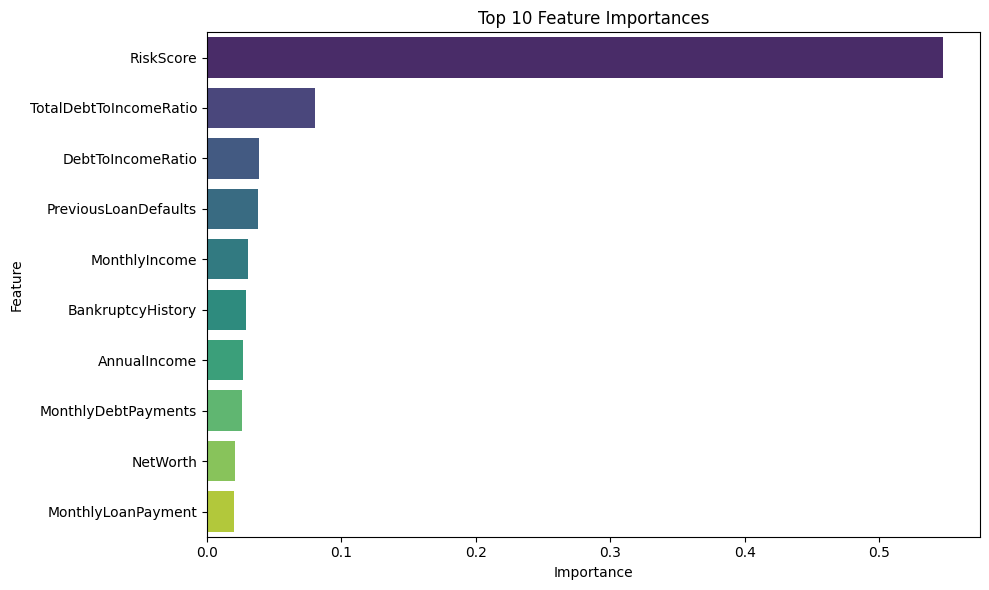

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importances = clf_xgb.feature_importances_
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
# Sort by importance and get the top 10 features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')

# Adding labels and title
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.tight_layout()
plt.show()

## **Neural Network**

Weighted Loss Function for Missclassification for Loan Amount





In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load the data
data = pd.read_csv("/content/financial-risk/Loan.csv")

# Remove outliers based on 'LoanAmount' using the IQR method
Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['LoanAmount'] >= lower_bound) & (data['LoanAmount'] <= upper_bound)]

# Drop the target from the features
X = data.drop(columns=['LoanApproved', 'ApplicationDate'])
y = data['LoanApproved'].astype(int)

# One-hot encode categorical features
categorical_features = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'DebtToIncomeRatio']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=4)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Train shape: (23185, 45), Test shape: (5797, 45)
Epoch 1/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5627 - loss: 0.7110 - val_accuracy: 0.6163 - val_loss: 0.6459
Epoch 2/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5815 - loss: 0.6777 - val_accuracy: 0.6112 - val_loss: 0.6491
Epoch 3/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5780 - loss: 0.6741 - val_accuracy: 0.6207 - val_loss: 0.6433
Epoch 4/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5902 - loss: 0.6686 - val_accuracy: 0.6006 - val_loss: 0.6574
Epoch 5/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5710 - loss: 0.6749 - val_accuracy: 0.5997 - val_loss: 0.6530
Epoch 6/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5709 - loss: 0.6739 - val_accuracy: 0.6118 - val_loss: 0.6573
Epoch 7/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5808 - loss: 0.6725 - val_accuracy: 0.6125 - val_loss: 0.6533
Epoch 8/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - a

In [ ]:
loan_amounts_train = X_train['LoanAmount'].values
loan_amounts_test = X_test['LoanAmount'].values
loss_fn = tf.keras.losses.BinaryCrossentropy()

# Compile the model with standard binary cross-entropy loss
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

# Train the model with sample weights derived from loan amounts
sample_weights = 1 + (loan_amounts_train - loan_amounts_train.min()) / (loan_amounts_train.max() - loan_amounts_train.min())
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, sample_weight=sample_weights)

Epoch 1/30
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5756 - loss: 0.9098 - val_accuracy: 0.5874 - val_loss: 0.8755
Epoch 2/30
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5891 - loss: 0.8993 - val_accuracy: 0.6172 - val_loss: 0.8773
Epoch 3/30
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5962 - loss: 0.9016 - val_accuracy: 0.6362 - val_loss: 0.8829
Epoch 4/30
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6115 - loss: 0.8911 - val_accuracy: 0.5974 - val_loss: 0.9012
Epoch 5/30
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5587 - loss: 0.9115 - val_accuracy: 0.5933 - val_loss: 0.8842
Epoch 6/30
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5793 - loss: 0.9018 - val_accuracy: 0.6118 - val_loss: 0.8879
Epoch 7/30
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5755 - loss: 0.9142 - val_accuracy: 0.6086 - val_loss: 0.8994
Epoch 8/30
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5815 - loss: 0.9120 - val_accuracy: 0.

182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Model Accuracy: 0.60
Precision: 0.57
Recall: 0.81
F1-score: 0.67


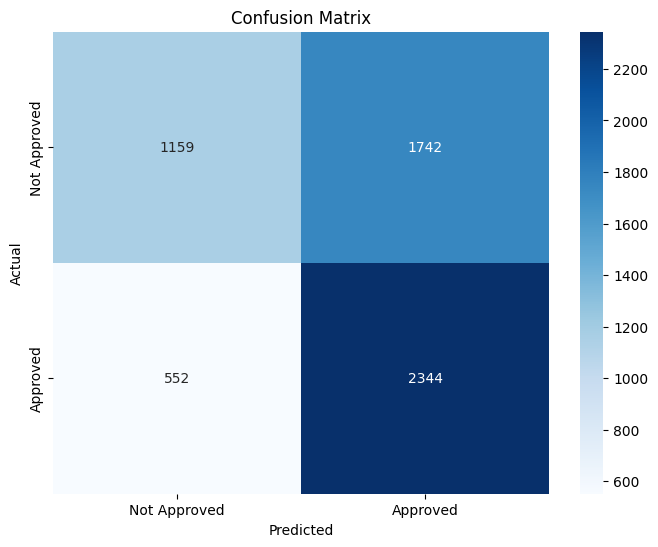

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Generate the confusion matrix
conf = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


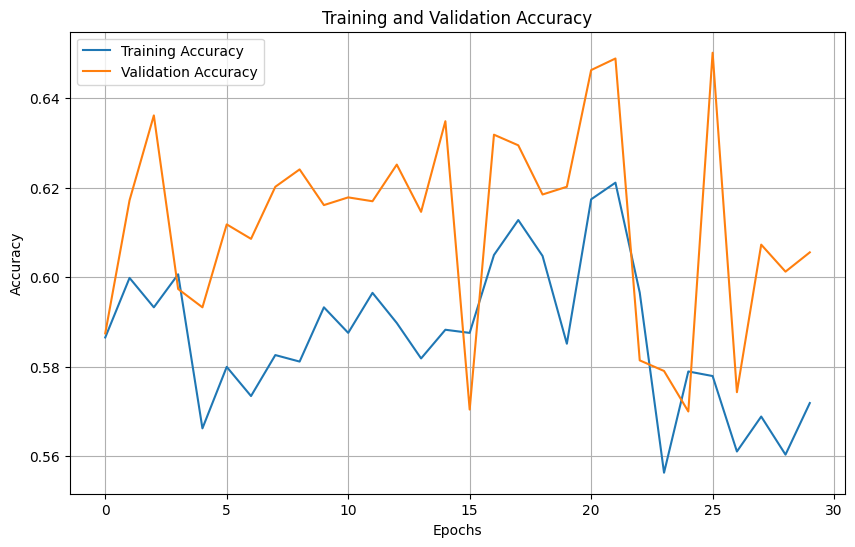

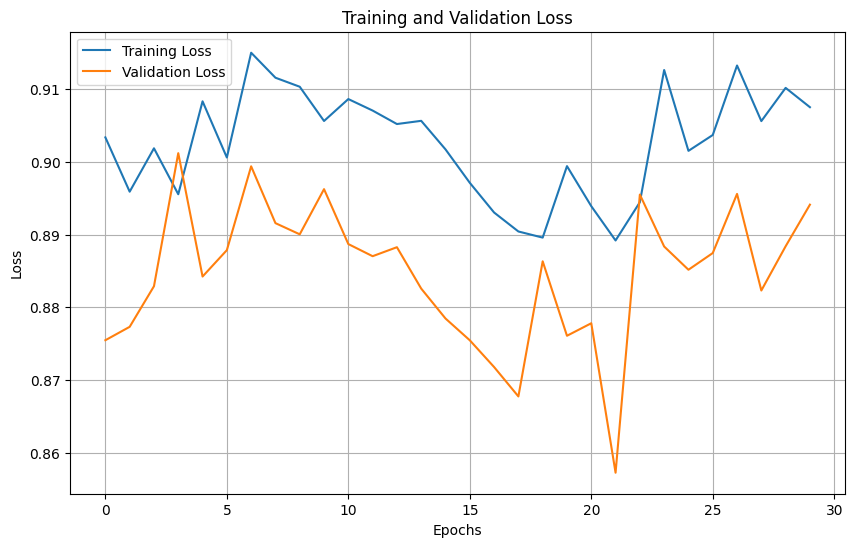

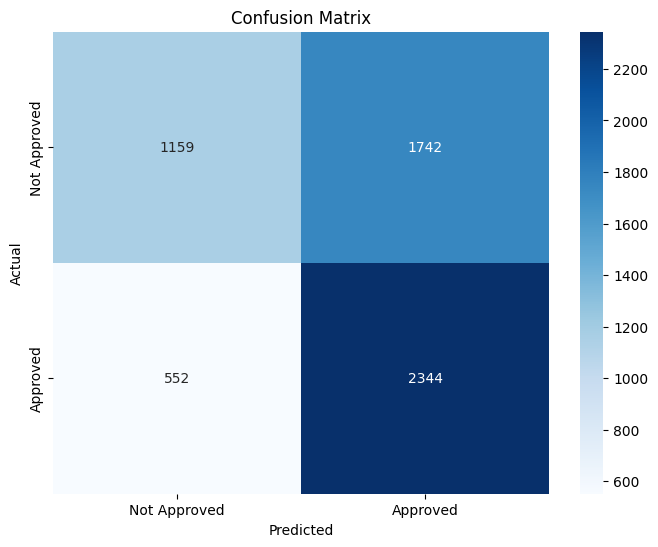

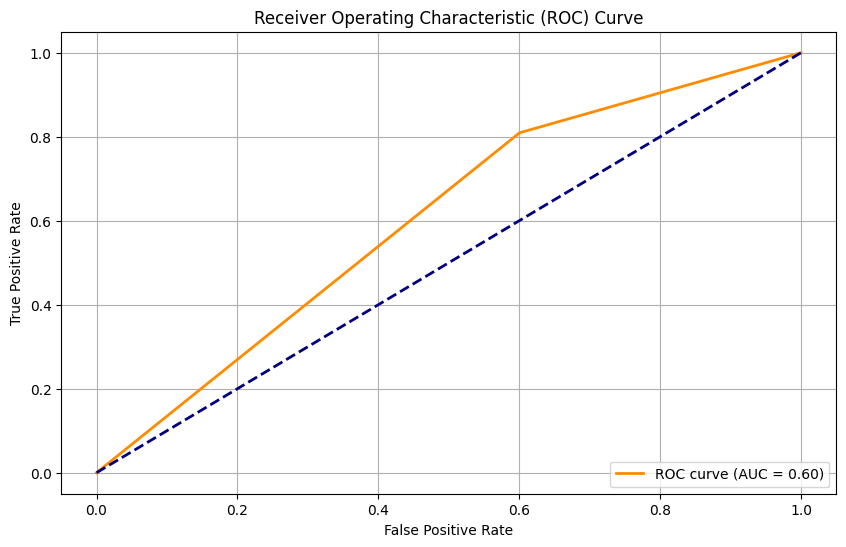

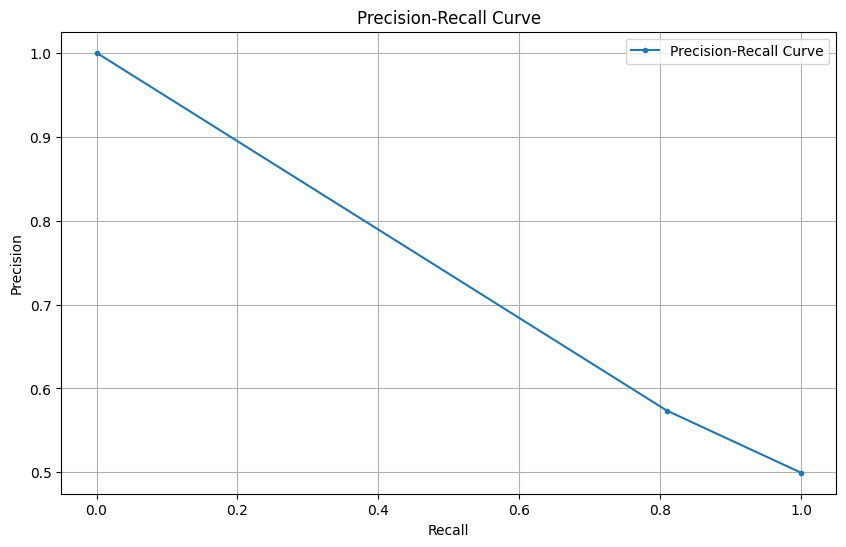

<ipython-input-18-b927f25f33a5>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred.flatten(), palette='viridis')


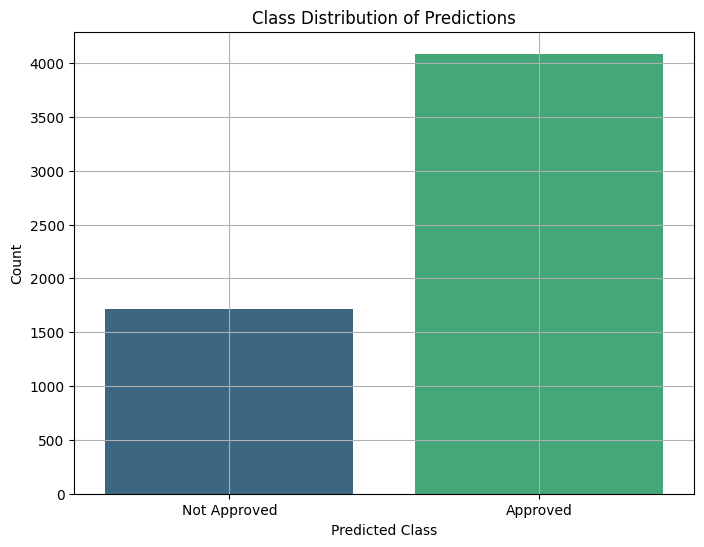

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# 1. Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 2. Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 5. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

# 6. Class Distribution of Predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred.flatten(), palette='viridis')
plt.title('Class Distribution of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.grid()
plt.show()


# **Part 2: Predicting Loan Interest Rates**

## **Principal Component Regression**

In [ ]:
# define response variable and features
X = df.drop(columns = ['ApplicationDate', 'BaseInterestRate', 'InterestRate'])
y = df['InterestRate']

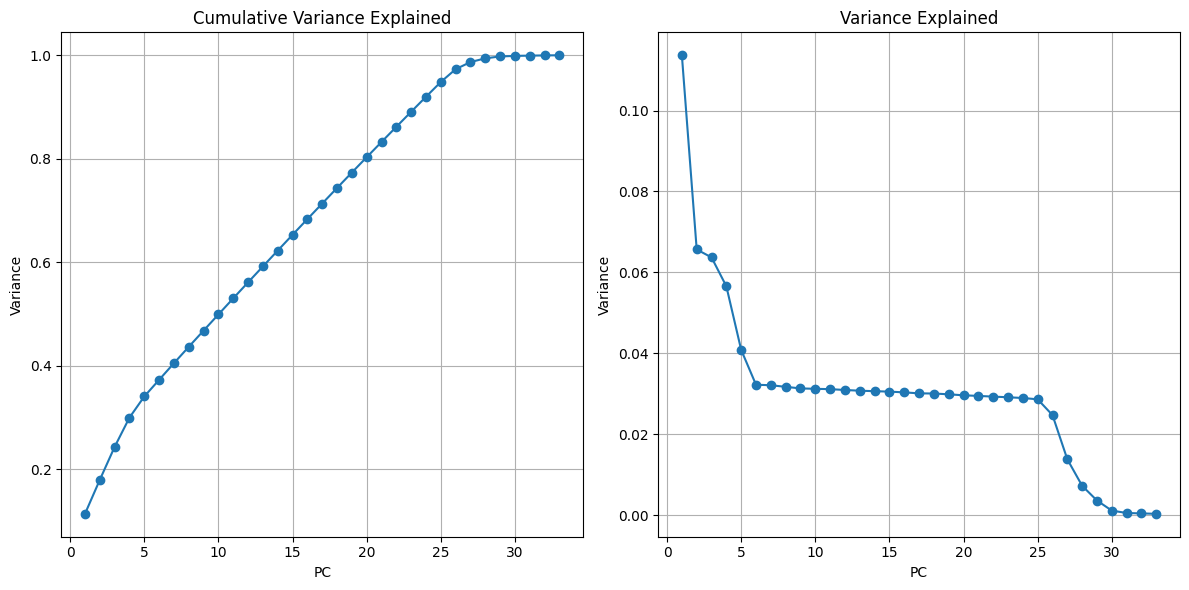

The optimal number of PCs is 30.
Test MSE: 0.0004979032803908223, Test R^2: 0.7226134416726427


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit pca
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# loadings matrix
loadings_matrix = pca.components_
#print(loadings_matrix)

# calculate cumulative variance explained and variance explained
exp_var = pca.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# plot cumulative variance explained
axes[0].plot(range(1, len(cum_var) + 1), cum_var, marker='o')
axes[0].set_title('Cumulative Variance Explained')
axes[0].set_xlabel('PC')
axes[0].set_ylabel('Variance')
axes[0].grid(True)

# plot explained variance
axes[1].plot(range(1, len(exp_var) + 1), exp_var, marker='o')
axes[1].set_title('Variance Explained')
axes[1].set_xlabel('PC')
axes[1].set_ylabel('Variance')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# use cross-validation to obtain the optimal number of PCs
max_components = len(X_train.columns)
cv_scores = []

for num_comp in range(1, max_components + 1):
    pca = PCA(n_components = num_comp)
    X_train_pca = pca.fit_transform(X_train_scaled)

    model = LinearRegression()
    cv_score = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    cv_scores.append(cv_score)

#print(cv_scores)

# Find the optimal number of components based on cross-validation
opt_num_comp = np.argmax(cv_scores) + 1
print(f"The optimal number of PCs is {opt_num_comp}.")

# perform PCR using the optimal number of PCs obtained
pca = PCA(n_components = opt_num_comp)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# train model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

# train metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# test metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

#print(f"Training MSE: {train_mse}, Training R^2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R^2: {test_r2}")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:",mean_absolute_error(y_test,y_pred_test))
print("MSE:",mean_squared_error(y_test,y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("R^2:",r2_score(y_test,y_pred_test))

MAE: 0.017938913718782326
MSE: 0.0004979032803908223
RMSE: 0.022313746444531053
R^2: 0.7226134416726427


From the Variance Explained plot, we observe kinks at 6 and 25 PCs. Hence, we will further perform PCR using these 2 values for number of components.

Using 6 PCs

In [ ]:
# perform PCR using 6 PCs
pca = PCA(n_components = 6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# train model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

# train metrics
train_mse_6 = mean_squared_error(y_train, y_pred_train)
train_r2_6 = r2_score(y_train, y_pred_train)

# test metrics
test_mse_6 = mean_squared_error(y_test, y_pred_test)
test_r2_6 = r2_score(y_test, y_pred_test)

print("The number of PCs used is 6.")
#print(f"Training MSE: {train_mse_6}, Training R^2: {train_r2_6}")
print(f"Test MSE: {test_mse_6}, Test R^2: {test_r2_6}")

The number of PCs used is 6.
Test MSE: 0.001255781434292796, Test R^2: 0.3003924581568357


Using 25 PCs

In [ ]:
# perform PCR using 25 PCs
pca = PCA(n_components = 25)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# train model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

# train metrics
train_mse_25 = mean_squared_error(y_train, y_pred_train)
train_r2_25 = r2_score(y_train, y_pred_train)

# test metrics
test_mse_25 = mean_squared_error(y_test, y_pred_test)
test_r2_25 = r2_score(y_test, y_pred_test)

print("The number of PCs used is 25.")
#print(f"Training MSE: {train_mse_25}, Training R^2: {train_r2_25}")
print(f"Test MSE: {test_mse_25}, Test R^2: {test_r2_25}")

The number of PCs used is 25.
Test MSE: 0.0008659120641117743, Test R^2: 0.5175923181514945


In [ ]:
PC_metrics = {
    "Number of PCs": [6, 25, opt_num_comp],
    #"Train MSE": [train_mse_6, train_mse_25, train_mse],
    "Test MSE": [test_mse_6, test_mse_25, test_mse],
    #"Train R^2": [train_r2_6, train_r2_25, train_r2],
    "Test R^2": [test_r2_6, test_r2_25, test_r2]
}

PC_metrics_df = pd.DataFrame(PC_metrics)

# Display it
print(PC_metrics_df)

   Number of PCs  Test MSE  Test R^2
0              6  0.001256  0.300392
1             25  0.000866  0.517592
2             30  0.000498  0.722613


The model using 30 PCs has the lowest MSE and highest R^2 on the test set.

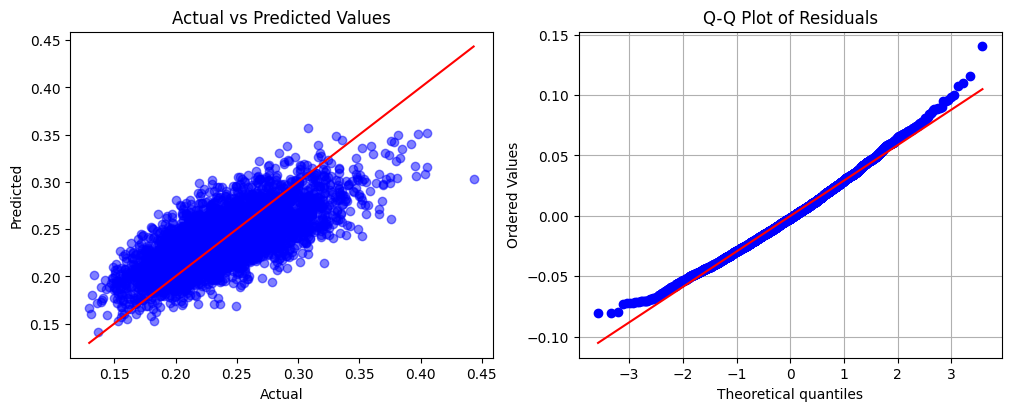

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

# plot actual vs predicted values
axes[0].scatter(y_test, y_pred_test, color='blue', alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].set_title("Actual vs Predicted Values")

# plot residuals
import scipy.stats as stats
residuals = y_test - y_pred_test
stats.probplot(residuals, dist="norm", plot=plt)
axes[1].set_title('Q-Q Plot of Residuals')
axes[1].grid()

plt.show()

## **Linear Regression with Auto Encoder**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("/content/financial-risk/Loan.csv")
y = data['InterestRate']
data = data.drop(columns=['ApplicationDate', 'InterestRate'])

categorical_features = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# y = pd.DataFrame(scaler.fit_transform(pd.DataFrame(y)), columns=['InterestRate'])

# Split the data into training, validation, and test sets
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train_tensor, X_train_tensor), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_test_tensor, X_test_tensor), batch_size=32, shuffle=False)

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, encoding_dim),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Model parameters
input_dim = X_train.shape[1]
encoding_dim = 16
model = Autoencoder(input_dim=input_dim, encoding_dim=encoding_dim)
model_6 = Autoencoder(input_dim=input_dim, encoding_dim=6)
model_25 = Autoencoder(input_dim=input_dim, encoding_dim=25)
model_30 = Autoencoder(input_dim=input_dim, encoding_dim=30)

  # Loss function and optimizer
def train_model(model):
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  # Early stopping parameters
  patience = 3
  min_delta = 0.001
  best_val_loss = float('inf')
  patience_counter = 0

  # Training loop with early stopping
  num_epochs = 100
  model.train()

  for epoch in range(num_epochs):
      train_loss = 0
      val_loss = 0

      # Training phase
      for batch_features, _ in train_loader:
          optimizer.zero_grad()
          encoded, decoded = model(batch_features)
          loss = criterion(decoded, batch_features)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()

      # Validation phase
      model.eval()
      with torch.no_grad():
          for batch_features, _ in val_loader:
              encoded, decoded = model(batch_features)
              loss = criterion(decoded, batch_features)
              val_loss += loss.item()

      # Calculate average losses
      train_loss /= len(train_loader)
      val_loss /= len(val_loader)

      print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

      # Check for early stopping
      if val_loss < best_val_loss - min_delta:
          best_val_loss = val_loss
          patience_counter = 0
      else:
          patience_counter += 1

      if patience_counter >= patience:
          print("Early stopping triggered!")
          break

      # Set model back to training mode
      model.train()

  # Use the encoder for dimensionality reduction
  model.eval()

train_model(model)
train_model(model_6)
train_model(model_25)
train_model(model_30)

with torch.no_grad():
    X_train_encoded = model.encoder(X_train_tensor)
    X_test_encoded = model.encoder(X_test_tensor)
    print(f"Original shape: {X_train_tensor.shape}")
    print(f"Reduced shape: {X_train_encoded.shape}")
    X_train_encoded = model_6.encoder(X_train_tensor)
    X_test_encoded = model_6.encoder(X_test_tensor)
    print(f"Original shape: {X_train_tensor.shape}")
    print(f"Reduced shape: {X_train_encoded.shape}")
    X_train_encoded = model_25.encoder(X_train_tensor)
    X_test_encoded = model_25.encoder(X_test_tensor)
    print(f"Original shape: {X_train_tensor.shape}")
    print(f"Reduced shape: {X_train_encoded.shape}")


print(f"Original shape: {X_train_tensor.shape}")
print(f"Reduced shape: {X_train_encoded.shape}")


Epoch [1/100], Train Loss: 0.7639, Validation Loss: 0.6045
Epoch [2/100], Train Loss: 0.5429, Validation Loss: 0.4762
Epoch [3/100], Train Loss: 0.4649, Validation Loss: 0.4419
Epoch [4/100], Train Loss: 0.4300, Validation Loss: 0.4081
Epoch [5/100], Train Loss: 0.4009, Validation Loss: 0.3879
Epoch [6/100], Train Loss: 0.3816, Validation Loss: 0.3672
Epoch [7/100], Train Loss: 0.3637, Validation Loss: 0.3526
Epoch [8/100], Train Loss: 0.3493, Validation Loss: 0.3393
Epoch [9/100], Train Loss: 0.3367, Validation Loss: 0.3335
Epoch [10/100], Train Loss: 0.3274, Validation Loss: 0.3247
Epoch [11/100], Train Loss: 0.3185, Validation Loss: 0.3105
Epoch [12/100], Train Loss: 0.3081, Validation Loss: 0.3014
Epoch [13/100], Train Loss: 0.2984, Validation Loss: 0.2953
Epoch [14/100], Train Loss: 0.2937, Validation Loss: 0.2918
Epoch [15/100], Train Loss: 0.2897, Validation Loss: 0.2864
Epoch [16/100], Train Loss: 0.2858, Validation Loss: 0.2862
Epoch [17/100], Train Loss: 0.2821, Validation Lo

In [ ]:
with torch.no_grad():
    X_train_encoded = model.encoder(X_train_tensor)
    X_test_encoded = model.encoder(X_test_tensor)
    print(f"Original shape: {X_train_tensor.shape}")
    print(f"Reduced shape: {X_train_encoded.shape}")
    X_train_encoded = model_6.encoder(X_train_tensor)
    X_test_encoded = model_6.encoder(X_test_tensor)
    print(f"Original shape: {X_train_tensor.shape}")
    print(f"Reduced shape: {X_train_encoded.shape}")
    X_train_encoded = model_25.encoder(X_train_tensor)
    X_test_encoded = model_25.encoder(X_test_tensor)
    print(f"Original shape: {X_train_tensor.shape}")
    print(f"Reduced shape: {X_train_encoded.shape}")

Original shape: torch.Size([14000, 45])
Reduced shape: torch.Size([14000, 16])
Original shape: torch.Size([14000, 45])
Reduced shape: torch.Size([14000, 6])
Original shape: torch.Size([14000, 45])
Reduced shape: torch.Size([14000, 25])


Based on the trend of loss, we can say that loss plateaues around 50 epochs, thus we will use this to train our autoencoder with 8 dimensions.

In [ ]:
from sklearn.linear_model import LinearRegression

reduced_data_6 = model_6.encoder(torch.tensor(data.values, dtype = torch.float32)).detach().numpy()
lin_reg_6 = LinearRegression().fit(reduced_data_6, y)

reduced_data_25 = model_25.encoder(torch.tensor(data.values, dtype = torch.float32)).detach().numpy()
lin_reg_25 = LinearRegression().fit(reduced_data_25, y)

reduced_data_30 = model_30.encoder(torch.tensor(data.values, dtype = torch.float32)).detach().numpy()
lin_reg_30 = LinearRegression().fit(reduced_data_30, y)


from sklearn.metrics import mean_squared_error, r2_score
import torch

def evaluate_model(model, data, y):
    reduced_data = model.encoder(torch.tensor(data.values, dtype=torch.float32)).detach().numpy()

    lin_reg = LinearRegression().fit(reduced_data, y)

    y_pred = lin_reg.predict(reduced_data)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return mse, r2

# Evaluate for model_6
# data = pd.read_csv("/content/financial-risk/Loan.csv")
# y = data['InterestRate']
mse_6, r2_6 = evaluate_model(model_6, data, y)
print(f"Model 6 - MSE: {mse_6:.4f}, R²: {r2_6:.4f}")

# Evaluate for model_25
mse_25, r2_25 = evaluate_model(model_25, data, y)
print(f"Model 25 - MSE: {mse_25:.4f}, R²: {r2_25:.4f}")

# Evaluate for model_30
mse_30, r2_30 = evaluate_model(model_30, data, y)
print(f"Model 30 - MSE: {mse_30:.4f}, R²: {r2_30:.4f}")



Model 6 - MSE: 0.0013, R²: 0.2782
Model 25 - MSE: 0.0006, R²: 0.6552
Model 30 - MSE: 0.0005, R²: 0.6921


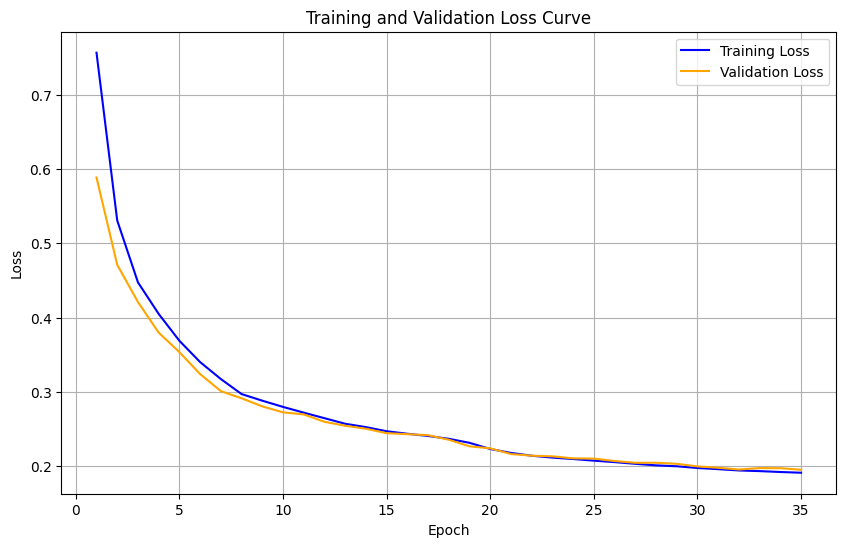

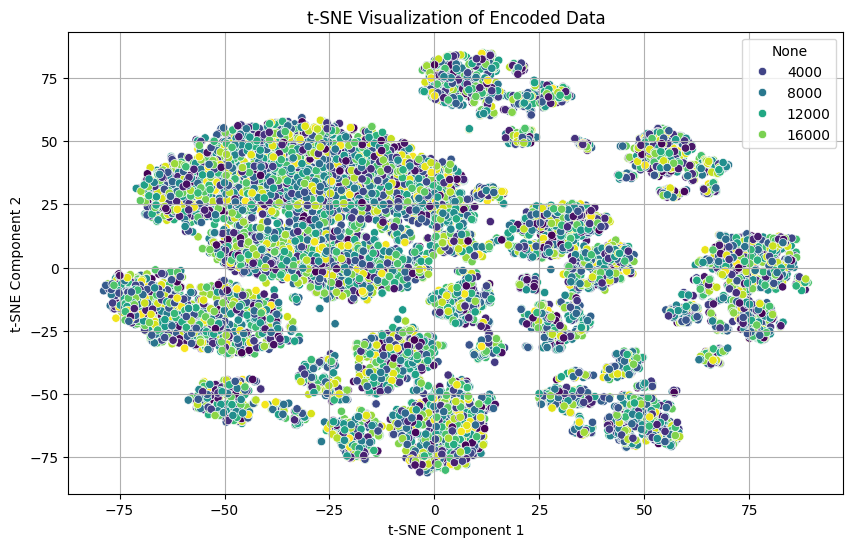

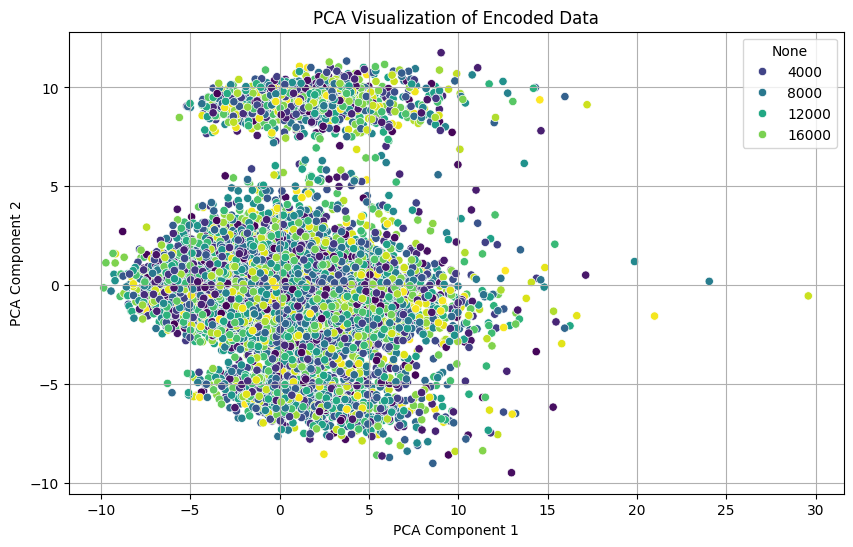

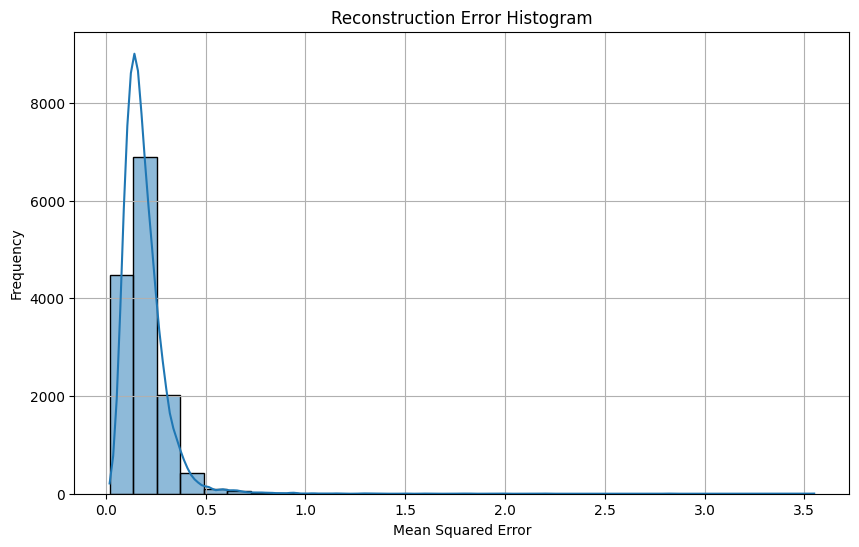

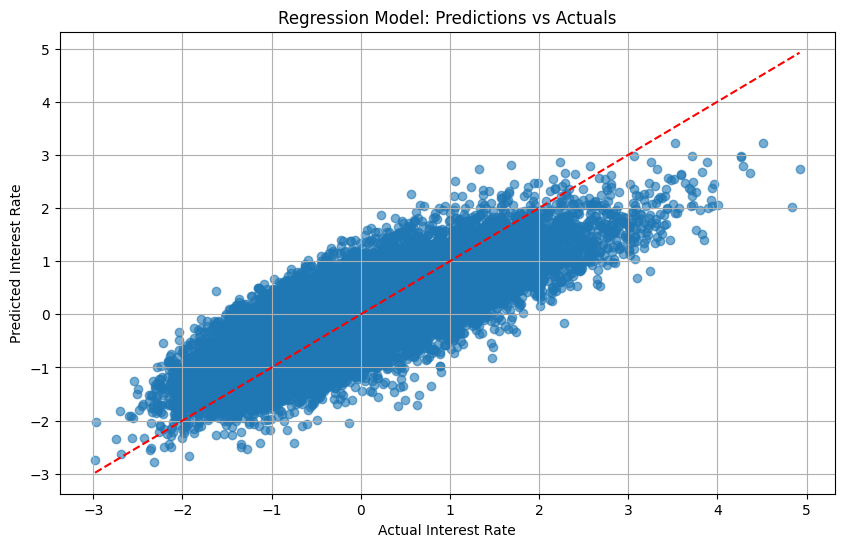

R-squared Score of Regression Model: 0.62


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, r2_score

# 1. Training and Validation Loss Curve
epochs = list(range(1, epoch + 2))
train_losses = [train_loss for train_loss in history['train_loss']]
val_losses = [val_loss for val_loss in history['val_loss']]

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.plot(epochs, val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 2. t-SNE Visualization of Encoded Data
X_encoded = X_train_encoded.detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_encoded)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=X_train.index, palette='viridis')
plt.title('t-SNE Visualization of Encoded Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

# 3. PCA Visualization of Encoded Data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_train.index, palette='viridis')
plt.title('PCA Visualization of Encoded Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

# 4. Reconstruction Error Histogram
reconstructed_data = model.decoder(X_train_encoded).detach().numpy()
mse_errors = np.mean((X_train_tensor.numpy() - reconstructed_data) ** 2, axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(mse_errors, bins=30, kde=True)
plt.title('Reconstruction Error Histogram')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 5. Regression Model Predictions vs Actuals
y_pred = lin_reg.predict(reduced_data)
y_actual = y.values.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linestyle='--')
plt.title('Regression Model: Predictions vs Actuals')
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.grid()
plt.show()

# 6. R-squared Score for Regression
r2 = r2_score(y_actual, y_pred)
print(f"R-squared Score of Regression Model: {r2:.2f}")


In [ ]:
# Encode the data using the trained encoder on the CPU
encoded_data = model.encoder(torch.tensor(data.values, dtype=torch.float32))

# Split the encoded data and the target variable 'y'
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(encoded_data, y, test_size=0.3, random_state=42)

# Train a linear regression model on the reduced data
lin_reg = LinearRegression().fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test_encoded)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")


## **Neural Networks with Principal Component Analysis & Auto Encoders**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [ ]:
import pandas as pd
data = pd.read_csv("/content/financial-risk/Loan.csv")
#data.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [ ]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
print(data.describe())

In [ ]:
data.dtypes

Age                               int64
AnnualIncome                      int64
CreditScore                       int64
Experience                        int64
LoanAmount                        int64
                                  ...  
HomeOwnershipStatus_Rent           bool
LoanPurpose_Debt Consolidation     bool
LoanPurpose_Education              bool
LoanPurpose_Home                   bool
LoanPurpose_Other                  bool
Length: 20045, dtype: object

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score

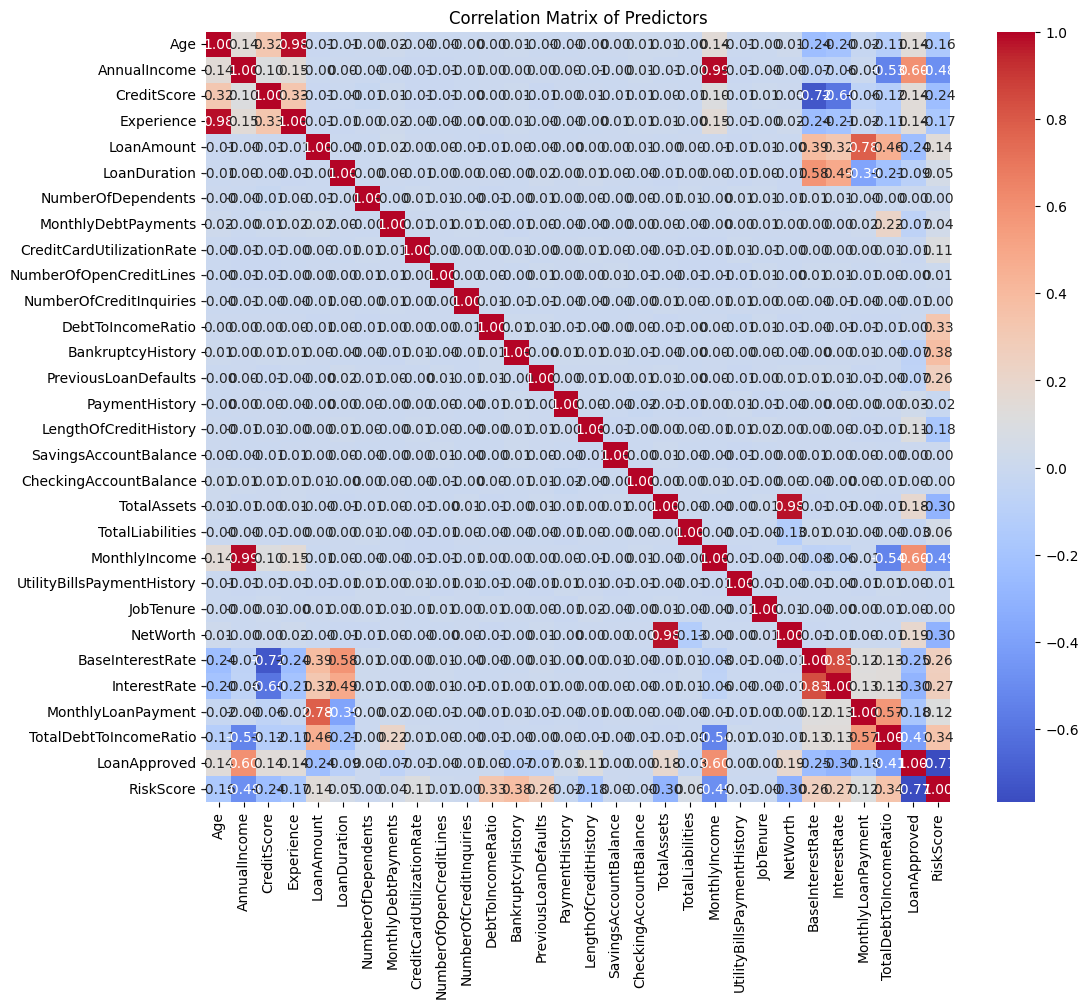

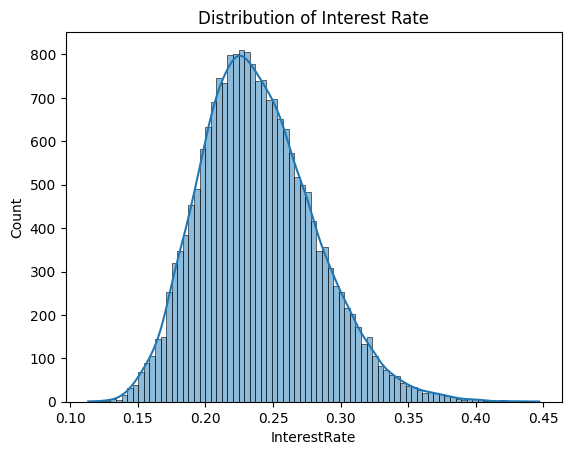

      ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0          2018-01-01   45         39948          617         Employed   
1          2018-01-02   38         39709          628         Employed   
2          2018-01-03   47         40724          570         Employed   
3          2018-01-04   58         69084          545         Employed   
4          2018-01-05   37        103264          594         Employed   
...               ...  ...           ...          ...              ...   
19995      2072-09-29   44         30180          587         Employed   
19996      2072-09-30   56         49246          567         Employed   
19997      2072-10-01   44         48958          645         Employed   
19998      2072-10-02   60         41025          560         Employed   
19999      2072-10-03   20         53227          574         Employed   

      EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0             Master          

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers
from plotnine import *

# %%
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Predictors')
plt.show()

# %%
# Identify and drop predictors that may cause leakage
leakage_columns = ['BaseInterestRate', 'MonthlyLoanPayment', 'LoanApproved', 'RiskScore']
data = data.drop(columns=leakage_columns)

# %%
sns.histplot(data['InterestRate'], kde=True)
plt.title('Distribution of Interest Rate')
plt.show()

# %%
data['ApplicationDate'] = pd.to_datetime(data['ApplicationDate'])
print(data)

# %%
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

if 'ApplicationDate' in categorical_cols:
    categorical_cols.remove('ApplicationDate')

# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(data.head())

# %%
df = data.drop("ApplicationDate", axis=1)

# %%
scaler = StandardScaler()

# Separate features and target
X = df.drop('InterestRate', axis=1)
y = df['InterestRate']


In [ ]:
# Scale features
X_scaled = scaler.fit_transform(X)

# %%
print(X_scaled)


# For Neural Network (with scaling)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


[[ 0.45148937 -0.47617228  0.8900213  ... -0.42074277  1.54127461
  -0.33388861]
 [-0.15079473 -0.48209548  1.10572414 ... -0.42074277 -0.64881365
  -0.33388861]
 [ 0.62357054 -0.45694048 -0.03161811 ...  2.37674908 -0.64881365
  -0.33388861]
 ...
 [ 0.36544878 -0.25287521  1.43908308 ... -0.42074277  1.54127461
  -0.33388861]
 [ 1.74209816 -0.44948072 -0.22771161 ... -0.42074277 -0.64881365
  -0.33388861]
 [-1.69952528 -0.14707553  0.04681928 ... -0.42074277 -0.64881365
   2.99501081]]


In [ ]:
# %%
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_nn.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1))  # No activation function for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=32, validation_data=(X_test_nn, y_test_nn))


# %%
train_history = pd.DataFrame(history.history)
train_history["epoch"] = np.arange(100) + 1
train_history = pd.melt(train_history, id_vars = "epoch", value_vars = ["loss", "val_loss"], var_name = "type")
ggplot(train_history, aes(x = "epoch", y = "value", color = "type")) + geom_point() + geom_line()

# Evaluate the model
mse_nn = model.evaluate(X_test_nn, y_test_nn, verbose=1)
y_pred_test = model.predict(X_test_nn)
# Calculate R² Score
r2_nn = r2_score(y_test_nn, y_pred_test.flatten())

# %%
models = ['Neural Network']
mses = [mse_nn]
r2s = [r2_nn]

comparison = pd.DataFrame({'Model': models, 'MSE': mses, 'R^2 Score': r2s})
print(comparison)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3707 - val_loss: 0.0430
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0479 - val_loss: 0.0296
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0295 - val_loss: 0.0218
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0210 - val_loss: 0.0160
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0152 - val_loss: 0.0114
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0108 - val_loss: 0.0078
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0073 - val_loss: 0.0050
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0013 - val_loss: 9.1280e-04
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━

In [ ]:
#PCA WITH CROSS-VALIDATION

kf = KFold(n_splits=5, shuffle=True, random_state=42)

n_components_list = range(1, X.shape[1] + 1)
cv_scores_lr = []
cv_scores_nn = []  # For Neural Network


In [ ]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

cv_scores_keras = []
n_components_list_keras = range(1, min(30, X.shape[1] + 1))  # Adjust as needed
average_mse_scores = []

from tensorflow.keras.backend import clear_session
from sklearn.metrics import mean_squared_error

for n_components in n_components_list:
    print(f"Evaluating {n_components} principal components...")

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    mse_scores = []

    for train_index, val_index in kf.split(X_pca):
        clear_session()

        X_train_cv, X_val_cv = X_pca[train_index], X_pca[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

        model = create_model(input_dim=n_components)
        model.fit(
            X_train_cv, y_train_cv,
            epochs=50,
            batch_size=32,
            verbose=0
        )

        y_pred_val = model.predict(X_val_cv).flatten()
        mse = mean_squared_error(y_val_cv, y_pred_val)
        mse_scores.append(mse)

    average_mse = np.mean(mse_scores)
    average_mse_scores.append(average_mse)
    print(f"Average MSE for {n_components} components: {average_mse}")

Evaluating 1 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 1 components: 0.0016492747588992347
Evaluating 2 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 2 components: 0.0016205236634103098
Evaluating 3 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 3 components: 0.001576384678402715
Evaluating 4 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 4 components: 0.0015753613062264471
Evaluating 5 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 5 components: 0.0015111624333762458
Evaluating 6 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 6 components: 0.0015271852656002316
Evaluating 7 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 7 components: 0.0015264647664185202
Evaluating 8 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 8 components: 0.001469525036620496
Evaluating 9 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 9 components: 0.0013591007741138095
Evaluating 10 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 10 components: 0.0013148951530604824
Evaluating 11 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 11 components: 0.0013001484868339396
Evaluating 12 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 12 components: 0.0012922619818601239
Evaluating 13 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 13 components: 0.001216188114714928
Evaluating 14 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 14 components: 0.0011751884185374351
Evaluating 15 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 15 components: 0.001129423791739585
Evaluating 16 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 16 components: 0.001117105046219449
Evaluating 17 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 17 components: 0.0011026441789933777
Evaluating 18 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 18 components: 0.0010833108648730526
Evaluating 19 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 19 components: 0.0010127292109111678
Evaluating 20 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 20 components: 0.0009653312109226019
Evaluating 21 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 21 components: 0.0009339890954454206
Evaluating 22 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 22 components: 0.0009060123243607402
Evaluating 23 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 23 components: 0.0008477561537689838
Evaluating 24 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 24 components: 0.0008142811157025783
Evaluating 25 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 25 components: 0.0008164821119514291
Evaluating 26 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 26 components: 0.0008133024187312796
Evaluating 27 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 27 components: 0.0007903880696845354
Evaluating 28 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 28 components: 0.0007631160770426628
Evaluating 29 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 29 components: 0.0007567414519772464
Evaluating 30 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 30 components: 0.0006585263647829046
Evaluating 31 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 31 components: 0.0006431505863682445
Evaluating 32 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 32 components: 0.0006340177680768983
Evaluating 33 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 33 components: 0.0005814906653405271
Evaluating 34 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 34 components: 0.0005631067012908643
Evaluating 35 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 35 components: 0.000567898878800802
Evaluating 36 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 36 components: 0.0005808047152472861
Evaluating 37 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 37 components: 0.0005664629641764407
Evaluating 38 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 38 components: 0.0005753945383650766
Evaluating 39 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 39 components: 0.0005797931916206825
Evaluating 40 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 40 components: 0.0005654276649169595
Evaluating 41 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 41 components: 0.0005689240891046838



Optimal number of principal components: 34


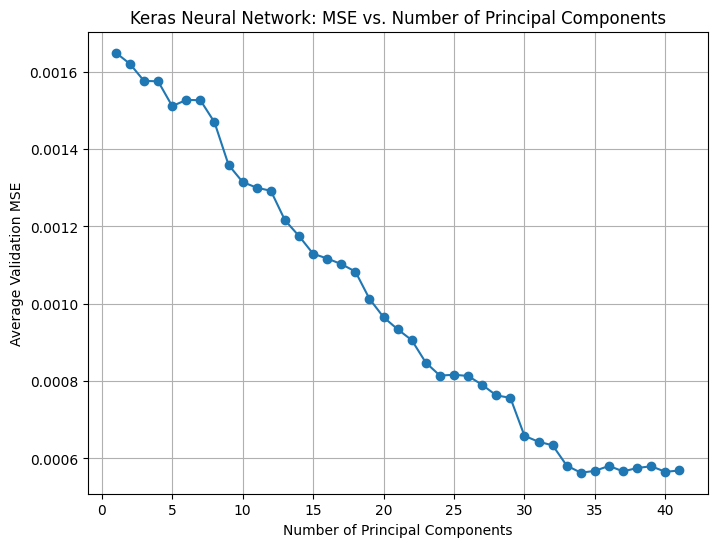

In [ ]:
optimal_index = np.argmin(average_mse_scores)
optimal_n_components = n_components_list[optimal_index]
print(f"\nOptimal number of principal components: {optimal_n_components}")

plt.figure(figsize=(8, 6))
plt.plot(n_components_list, average_mse_scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Average Validation MSE')
plt.title('Keras Neural Network: MSE vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=optimal_n_components)
X_pca_optimal = pca.fit_transform(X_scaled)


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_optimal, y, test_size=0.2, random_state=42)

clear_session()

final_model = create_model(input_dim=optimal_n_components)
history = final_model.fit(
    X_train_pca, y_train_pca,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_pca, y_test_pca),
    verbose=0
)

y_pred_test = final_model.predict(X_test_pca).flatten()
mse_final = mean_squared_error(y_test_pca, y_pred_test)
r2_final = r2_score(y_test_pca, y_pred_test)

print('Final Keras Neural Network with Optimal PCA Components MSE:', mse_final)
print('Final Keras Neural Network with Optimal PCA Components R^2 Score:', r2_final)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Final Keras Neural Network with Optimal PCA Components MSE: 0.0005712118161511046
Final Keras Neural Network with Optimal PCA Components R^2 Score: 0.6817725731115818


Deeper Neural Network

In [ ]:
def create_deeper_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

cv_scores_deeper = []
n_components_list_deeper = range(1, min(30, X.shape[1] + 1))  # Adjust as needed
average_mse_scores_deeper = []

for n_components in n_components_list_deeper:
    print(f"Evaluating {n_components} principal components...")

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    mse_scores = []

    for train_index, val_index in kf.split(X_pca):
        clear_session()

        X_train_cv, X_val_cv = X_pca[train_index], X_pca[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

        model = create_deeper_model(input_dim=n_components)
        model.fit(
            X_train_cv, y_train_cv,
            epochs=50,
            batch_size=32,
            verbose=0
        )

        y_pred_val = model.predict(X_val_cv).flatten()
        mse = mean_squared_error(y_val_cv, y_pred_val)
        mse_scores.append(mse)

    average_mse = np.mean(mse_scores)
    average_mse_scores_deeper.append(average_mse)
    print(f"Average MSE for {n_components} components: {average_mse}")

Evaluating 1 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 1 components: 0.0016984780053310993
Evaluating 2 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 2 components: 0.001656951631854445
Evaluating 3 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 3 components: 0.0016285188196732748
Evaluating 4 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 4 components: 0.0016501737425151544
Evaluating 5 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 5 components: 0.0015832721979219234
Evaluating 6 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 6 components: 0.001565979986563639
Evaluating 7 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 7 components: 0.0015890619771323333
Evaluating 8 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 8 components: 0.0015317708189232769
Evaluating 9 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 9 components: 0.0014216966297497834
Evaluating 10 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 10 components: 0.0013693049062725039
Evaluating 11 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 11 components: 0.001380226682559808
Evaluating 12 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 12 components: 0.0013491342201718758
Evaluating 13 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 13 components: 0.0013620322353511468
Evaluating 14 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 14 components: 0.0013104651748463612
Evaluating 15 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 15 components: 0.0012407383239398516
Evaluating 16 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 16 components: 0.0012098178274224265
Evaluating 17 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 17 components: 0.0011966122407357665
Evaluating 18 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 18 components: 0.0011612813236174385
Evaluating 19 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average MSE for 19 components: 0.0010853569903336228
Evaluating 20 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 20 components: 0.001079149822971479
Evaluating 21 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 21 components: 0.0010027907997947811
Evaluating 22 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average MSE for 22 components: 0.0010296437119639494
Evaluating 23 principal components...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [ ]:
optimal_index = np.argmin(average_mse_scores_deeper)
optimal_n_components_deeper = n_components_list_deeper[optimal_index]
print(f"\nOptimal number of principal components: {optimal_n_components_deeper}")

In [ ]:
pca = PCA(n_components=optimal_n_components_deeper)
X_pca_optimal_deeper = pca.fit_transform(X_scaled)


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_optimal_deeper, y, test_size=0.2, random_state=42)

clear_session()

final_model = create_deeper_model(input_dim=optimal_n_components_deeper)
history = final_model.fit(
    X_train_pca, y_train_pca,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_pca, y_test_pca),
    verbose=0
)

y_pred_test = final_model.predict(X_test_pca).flatten()
mse_final = mean_squared_error(y_test_pca, y_pred_test)
r2_final = r2_score(y_test_pca, y_pred_test)

print('Keras Deeper Neural Network with Optimal PCA Components MSE:', mse_final)
print('Keras Deeper Neural Network with Optimal PCA Components R^2 Score:', r2_final)

Wider Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.backend import clear_session

def create_wider_model(input_dim):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)
n_components_list = range(1, min(30, X_scaled.shape[1] + 1))  #Test up to 30 PC
average_mse_scores_wider = []

for n_components in n_components_list:
    print(f"Evaluating {n_components} principal components for Wider Neural Network...")

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    mse_scores = []

    for train_index, val_index in kf.split(X_pca):
        clear_session()

        X_train_cv, X_val_cv = X_pca[train_index], X_pca[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

        model = create_wider_model(input_dim=n_components)
        model.fit(
            X_train_cv, y_train_cv,
            epochs=50,
            batch_size=32,
            verbose=0
        )

        y_pred_val = model.predict(X_val_cv).flatten()
        mse = mean_squared_error(y_val_cv, y_pred_val)
        mse_scores.append(mse)

    average_mse = np.mean(mse_scores)
    average_mse_scores_wider.append(average_mse)
    print(f"Average MSE for {n_components} components: {average_mse}")

optimal_index_wider = np.argmin(average_mse_scores_wider)
optimal_n_components_wider = n_components_list[optimal_index_wider]
print(f"\nOptimal number of principal components for Wider Neural Network: {optimal_n_components_wider}")

plt.figure(figsize=(8, 6))
plt.plot(n_components_list, average_mse_scores_wider, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Average Validation MSE')
plt.title('Wider Neural Network: MSE vs. Number of Principal Components')
plt.grid(True)
plt.show()


Neural Network with Auto Encoder

In [ ]:
def create_autoencoder(input_dim, encoding_dim):
    model = Sequential()
    model.add(Dense(encoding_dim, activation='relu', input_dim=input_dim))
    model.add(Dense(input_dim, activation='linear'))  # Reconstruct input
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def encode_data(input_dim, encoding_dim, X):
    autoencoder = create_autoencoder(input_dim, encoding_dim)
    autoencoder.fit(X, X, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    encoder = Sequential(autoencoder.layers[:-1])  # Exclude decoder layer
    return encoder.predict(X)
def create_auto_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

cv_scores_auto_nn = []
encoding_dims = range(15, 30, 5)  # Test encoding dimensions from 15 to 30
average_mse_scores_auto_nn = []

for encoding_dim in encoding_dims:
    print(f"Evaluating encoding dimension {encoding_dim}...")

    # Encode the data
    X_encoded = encode_data(X_scaled.shape[1], encoding_dim, X_scaled)

    mse_scores = []

    for train_index, val_index in kf.split(X_encoded):
        clear_session()

        X_train_cv, X_val_cv = X_encoded[train_index], X_encoded[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

        model = create_auto_nn_model(input_dim=encoding_dim)
        model.fit(
            X_train_cv, y_train_cv,
            epochs=50,
            batch_size=32,
            verbose=0
        )

        y_pred_val = model.predict(X_val_cv).flatten()
        mse = mean_squared_error(y_val_cv, y_pred_val)
        mse_scores.append(mse)

    average_mse = np.mean(mse_scores)
    average_mse_scores_auto_nn.append(average_mse)
    print(f"Average MSE for encoding dimension {encoding_dim}: {average_mse}")


In [ ]:
optimal_index_auto_nn = np.argmin(average_mse_scores_auto_nn)
optimal_encoding_dim = encoding_dims[optimal_index_auto_nn]
print(f"\nOptimal encoding dimension for Autoencoder + Neural Network: {optimal_encoding_dim}")

plt.figure(figsize=(8, 6))
plt.plot(encoding_dims, average_mse_scores_auto_nn, marker='o')
plt.xlabel('Encoding Dimension')
plt.ylabel('Average Validation MSE')
plt.title('Autoencoder + Neural Network: MSE vs. Encoding Dimension')
plt.grid(True)
plt.show()

X_encoded_optimal = encode_data(X_scaled.shape[1], optimal_encoding_dim, X_scaled)

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
    X_encoded_optimal, y, test_size=0.2, random_state=42)

clear_session()

final_auto_nn_model = create_auto_nn_model(input_dim=optimal_encoding_dim)
history_auto_nn = final_auto_nn_model.fit(
    X_train_enc, y_train_enc,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_enc, y_test_enc),
    verbose=0
)

y_pred_test_auto_nn = final_auto_nn_model.predict(X_test_enc).flatten()
mse_final_auto_nn = mean_squared_error(y_test_enc, y_pred_test_auto_nn)
r2_final_auto_nn = r2_score(y_test_enc, y_pred_test_auto_nn)

print('Autoencoder + Neural Network with Optimal Encoding Dimension MSE:', mse_final_auto_nn)
print('Autoencoder + Neural Network with Optimal Encoding Dimension R^2 Score:', r2_final_auto_nn)

In [ ]:
"""
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train_pca)

y_pred_pca_lr = lr_pca_model.predict(X_test_pca)

mse_pca_lr = mean_squared_error(y_test_pca, y_pred_pca_lr)
r2_pca_lr = r2_score(y_test_pca, y_pred_pca_lr)

print('Linear Regression with PCA MSE:', mse_pca_lr)
print('Linear Regression with PCA R^2 Score:', r2_pca_lr)

"""

In [ ]:
"""
nn_pca_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
nn_pca_model.fit(X_train_pca, y_train_pca)

y_pred_pca_nn = nn_pca_model.predict(X_test_pca)

mse_pca_nn = mean_squared_error(y_test_pca, y_pred_pca_nn)
r2_pca_nn = r2_score(y_test_pca, y_pred_pca_nn)

print('Neural Network with PCA MSE:', mse_pca_nn)
print('Neural Network with PCA R^2 Score:', r2_pca_nn)

# %%
# Using Keras
pca_nn_model = Sequential()
pca_nn_model.add(Dense(64, activation='relu', input_dim=X_train_pca.shape[1]))
pca_nn_model.add(Dropout(0.2))
pca_nn_model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
pca_nn_model.add(Dropout(0.2))
pca_nn_model.add(Dense(1))  # No activation function for regression

# Compile
pca_nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train
pca_history = pca_nn_model.fit(X_train_pca, y_train_pca, epochs=100, batch_size=32, validation_data=(X_test_pca, y_test_pca))

# Evaluate
y_pred_pca_nn_keras = pca_nn_model.predict(X_test_pca).flatten()
mse_pca_nn_keras = mean_squared_error(y_test_pca, y_pred_pca_nn_keras)
r2_pca_nn_keras = r2_score(y_test_pca, y_pred_pca_nn_keras)

print('Keras Neural Network with PCA MSE:', mse_pca_nn_keras)
print('Keras Neural Network with PCA R^2 Score:', r2_pca_nn_keras)

# %%
models = [
    'Linear Regression',
    'Polynomial Regression',
    'Neural Network',
    'Linear Regression with PCA',
    'Neural Network with PCA (Sklearn)',
    'Neural Network with PCA (Keras)'
]

mses = [mse_lr, mse_pr, mse_nn, mse_pca_lr, mse_pca_nn, mse_pca_nn_keras]
r2s = [r2_lr, r2_pr, r2_nn, r2_pca_lr, r2_pca_nn, r2_pca_nn_keras]

comparison_pca = pd.DataFrame({'Model': models, 'MSE': mses, 'R^2 Score': r2s})
print(comparison_pca)

# %%
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

"""
